In [1]:
from datetime import datetime, timezone

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 500
pd.options.display.max_columns = 200

import warnings

warnings.filterwarnings("ignore")

In [2]:
rdf = pd.read_csv('data.csv')

In [3]:
rdf

,Province_State,Country_Region,Last_Update,Confirmed,Deaths,Recovered,FIPS,Admin2,Latitude,Longitude,Active,Combined_Key,Incidence_Rate,Case_Fatality_Ratio
0,Hubei,Mainland China,2020-02-26T14:13:10,65187.0,2615.0,20969.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Guangdong,Mainland China,2020-02-26T10:33:02,1347.0,7.0,851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Henan,Mainland China,2020-02-26T10:33:02,1271.0,19.0,1033.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,South Korea,2020-02-26T11:03:11,1261.0,12.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Zhejiang,Mainland China,2020-02-26T10:33:02,1205.0,1.0,867.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673865,Queensland,Australia,2020-04-25 06:31:19,1026.0,6.0,738.0,NaN,NaN,-27.4698,153.0251,282.0,"Queensland, Australia",NaN,NaN
673866,South Australia,Australia,2020-04-25 06:31:19,438.0,4.0,331.0,NaN,NaN,-34.9285,138.6007,103.0,"South Australia, Australia",NaN,NaN
673867,Tasmania,Australia,2020-04-25 06:31:19,207.0,9.0,67.0,NaN,NaN,-42.8821,147.3272,131.0,"Tasmania, Australia",NaN,NaN
673868,Victoria,Australia,2020-04-25 06:31:19,1343.0,16.0,1172.0,NaN,NaN,-37.8136,144.9631,155.0,"Victoria, Australia",NaN,NaN


- For an explanation of each column https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data
- FIPS: Federal Information Processing Standards
State and county files contain FIPS codes, a standard geographic identifier, to make it easier for an analyst to combine this data with other data sets like a map file or population data (source: https://github.com/nytimes/covid-19-data)
- US only - County name (source: https://www.tableau.com/about/blog/2020/3/coronavirus-data-hub-faq)

In [4]:
df = rdf.copy()

In [5]:
df.shape

(673870, 14)

In [6]:
df.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Confirmed',
       'Deaths', 'Recovered', 'FIPS', 'Admin2', 'Latitude', 'Longitude',
       'Active', 'Combined_Key', 'Incidence_Rate', 'Case_Fatality_Ratio'],
      dtype='object')

In [7]:
df['Province_State'].nunique()

724

In [8]:
df['Country_Region'].nunique()

238

In [9]:
df['Combined_Key'].nunique()

4104

In [14]:
popdf = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_1345178.csv', skiprows=2, header=1)
popdf.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN


In [15]:
popdf.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', 'Unnamed: 64'],
      dtype='object')

In [16]:
popdf = popdf[['Country Name', '2019']]
popdf.head()

,Country Name,2019
0,Aruba,106314.0
1,Afghanistan,38041754.0
2,Angola,31825295.0
3,Albania,2854191.0
4,Andorra,77142.0


In [ ]:
# (
#     df[(df.Country_Region == "US") & (df.Last_Update == "2020-09-23 04:23:40")]
#     .sort_values("Last_Update", ascending=False)
#     .Deaths.sum()
# )

In [18]:
latestdf = df[(df.Last_Update == "2020-09-23 04:23:40")]

In [26]:
latest_by_country = latestdf.groupby(['Country_Region'])['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
latest_by_country.head()

,Country_Region,Confirmed,Deaths,Recovered
0,Afghanistan,39096.0,1445.0,32576.0
1,Albania,12666.0,367.0,7042.0
2,Algeria,50214.0,1689.0,35307.0
3,Andorra,1681.0,53.0,1199.0
4,Angola,4236.0,155.0,1462.0


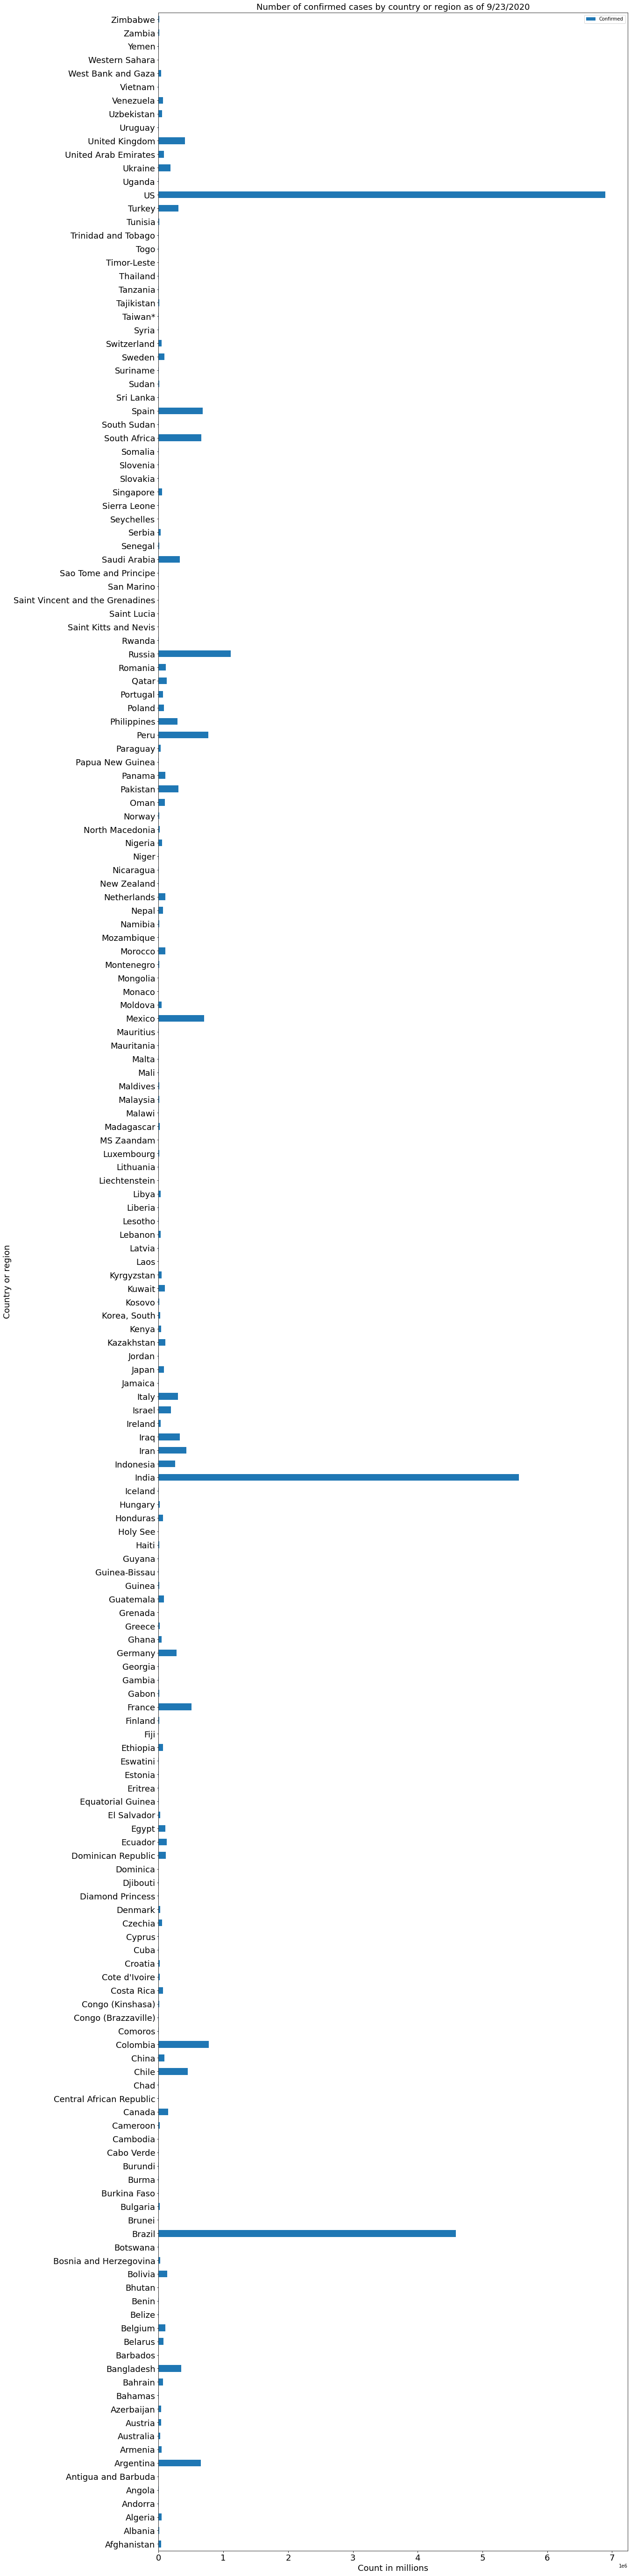

In [51]:
latest_by_country.groupby(['Country_Region'])['Confirmed'].sum().to_frame("Confirmed").plot.barh(figsize=(18, 100), fontsize=18)
plt.xlabel("Count in millions", fontsize=18)
plt.ylabel("Country or region", fontsize=18)
plt.title("Number of confirmed cases by country or region as of 9/23/2020", fontsize=18);

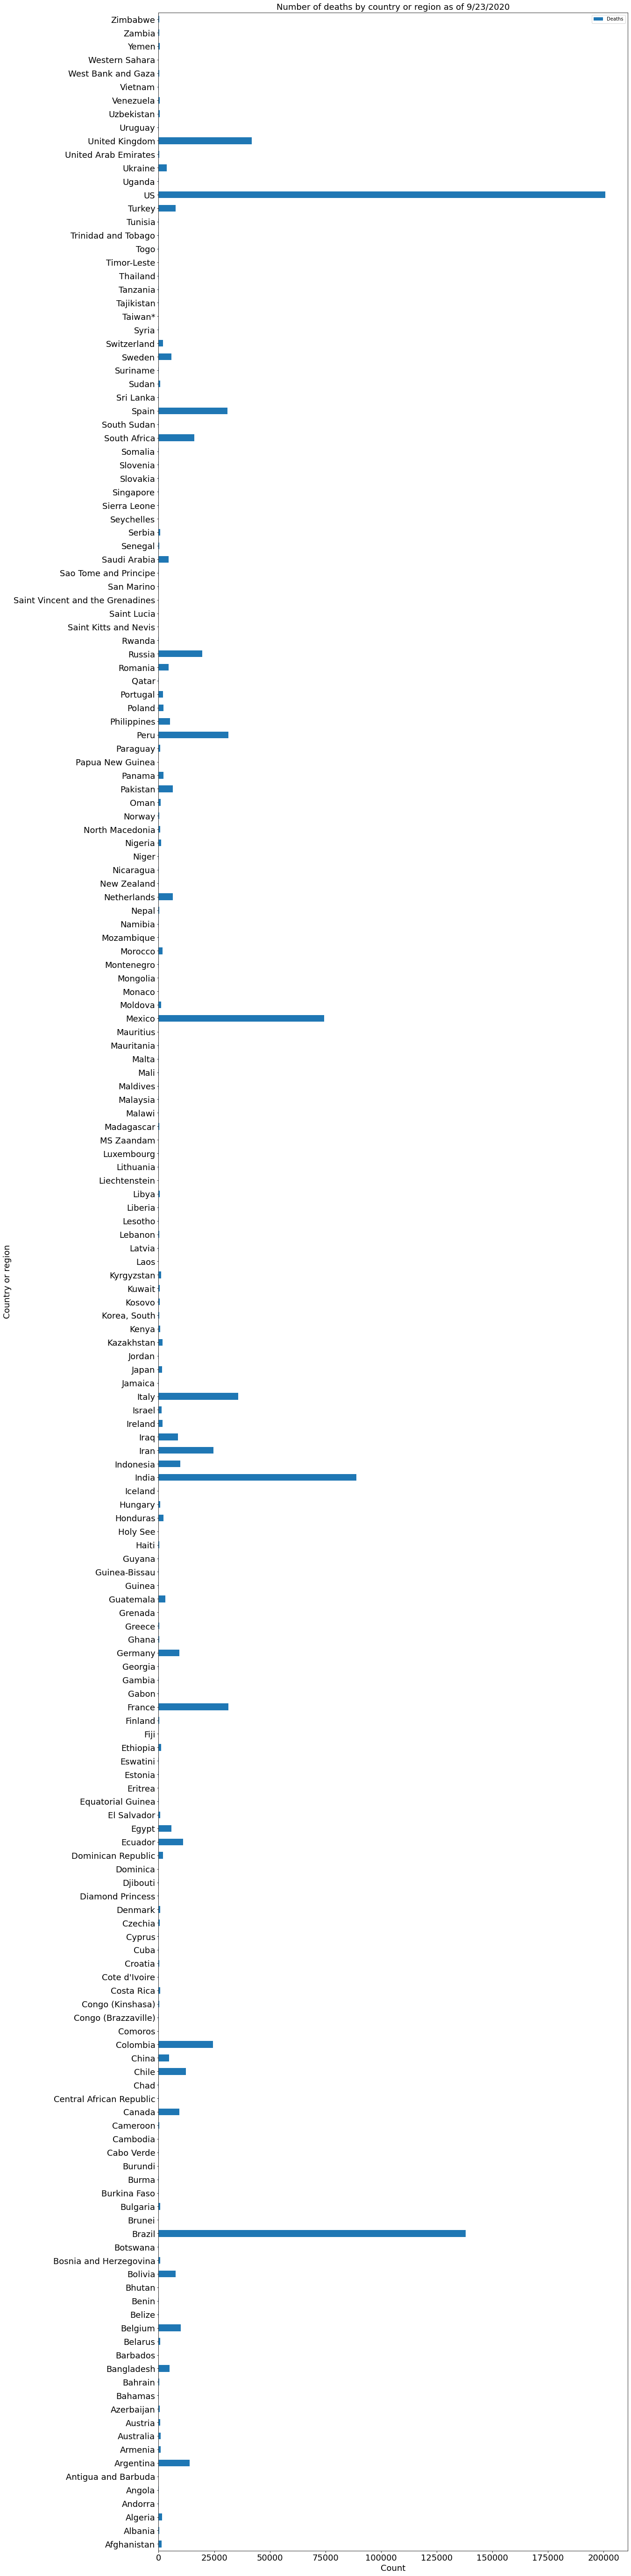

In [50]:
latest_by_country.groupby(['Country_Region'])['Deaths'].sum().to_frame("Deaths").plot.barh(figsize=(18, 100), fontsize=18)
plt.xlabel("Count", fontsize=18)
plt.ylabel("Country or region", fontsize=18)
plt.title("Number of deaths by country or region as of 9/23/2020", fontsize=18);

In [22]:
latest_by_country['Deaths'].sum()

969575.0

In [23]:
(
    df[(df.Last_Update == "2020-09-23 04:23:40")]
    .sort_values("Last_Update", ascending=False)
    .Deaths.sum()
)

969575.0

In [24]:
popdf.head()

,Country Name,2019
0,Aruba,106314.0
1,Afghanistan,38041754.0
2,Angola,31825295.0
3,Albania,2854191.0
4,Andorra,77142.0


In [41]:
confpop = pd.merge(latest_by_country, popdf, how='outer', left_on= 'Country_Region', right_on = 'Country Name')
confpop.head()

,Country_Region,Confirmed,Deaths,Recovered,Country Name,2019
0,Afghanistan,39096.0,1445.0,32576.0,Afghanistan,38041754.0
1,Albania,12666.0,367.0,7042.0,Albania,2854191.0
2,Algeria,50214.0,1689.0,35307.0,Algeria,43053054.0
3,Andorra,1681.0,53.0,1199.0,Andorra,77142.0
4,Angola,4236.0,155.0,1462.0,Angola,31825295.0


In [34]:
pc = set(popdf['Country Name'])

In [32]:
cc = set(latest_by_country.Country_Region)

In [35]:
pc - cc

{'American Samoa',
 'Arab World',
 'Aruba',
 'Bahamas, The',
 'Bermuda',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Caribbean small states',
 'Cayman Islands',
 'Central Europe and the Baltics',
 'Channel Islands',
 'Congo, Dem. Rep.',
 'Congo, Rep.',
 'Curacao',
 'Czech Republic',
 'Early-demographic dividend',
 'East Asia & Pacific',
 'East Asia & Pacific (IDA & IBRD countries)',
 'East Asia & Pacific (excluding high income)',
 'Egypt, Arab Rep.',
 'Euro area',
 'Europe & Central Asia',
 'Europe & Central Asia (IDA & IBRD countries)',
 'Europe & Central Asia (excluding high income)',
 'European Union',
 'Faroe Islands',
 'Fragile and conflict affected situations',
 'French Polynesia',
 'Gambia, The',
 'Gibraltar',
 'Greenland',
 'Guam',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'Hong Kong SAR, China',
 'IBRD only',
 'IDA & IBRD total',
 'IDA blend',
 'IDA only',
 'IDA total',
 'Iran, Islamic Rep.',
 'Isle of Man',
 'Kiribati',
 'Korea, Dem. People’s Rep.',
 

In [36]:
cc - pc

{'Bahamas',
 'Brunei',
 'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Czechia',
 'Diamond Princess',
 'Egypt',
 'Gambia',
 'Holy See',
 'Iran',
 'Korea, South',
 'Kyrgyzstan',
 'Laos',
 'MS Zaandam',
 'Russia',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Vincent and the Grenadines',
 'Slovakia',
 'Syria',
 'Taiwan*',
 'US',
 'Venezuela',
 'Western Sahara',
 'Yemen'}